In [ ]:
%matplotlib inline

# 사용할 라이브러리를 불러옵니다.
import numpy as np                                     # 배열(array)을 쉽게 사용하기 위한 라이브러리입니다.
import pandas as pd                                    # 데이터를 쉽게 보고 사용하기 위한 라이브러리입니다.
import matplotlib.pyplot as plt                        # 시각화 설정 클래스입니다.

from sklearn.linear_model import LogisticRegression    # 사용할 머신러닝 알고리즘입니다.
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix      # 모델 성능평가를 위한 함수입니다.


plt.rcParams['figure.figsize'] = [16, 8]

# 학습 데이터를 불러옵니다.
train = pd.read_csv('./train.csv', sep=',', encoding='utf-8')
x_train = train.drop(['target', 'species'], axis=1).values
y_train = train['target'].values

# 테스트 데이터를 불러옵니다.
test = pd.read_csv('./test.csv', sep=',', encoding='utf-8')
x_test = test.drop(['target', 'species'], axis=1).values
y_test = test['target'].values

# 사용할 모델을 불러옵니다.
lgr = LogisticRegression(
    n_jobs=-1
)

# 모델을 학습합니다.
lgr.fit(
    X=x_train,
    y=y_train
)

# 테스트 데이터로 예측합니다.
pred = lgr.predict(x_test)
test['prediction'] = pred
test['prediction_species'] = test['prediction'].replace({0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'})

# 테스트 데이터로 정확성을 확인합니다.
print('Accuracy: ', lgr.score(x_test, y_test) * 100)

Accuracy:  100.0


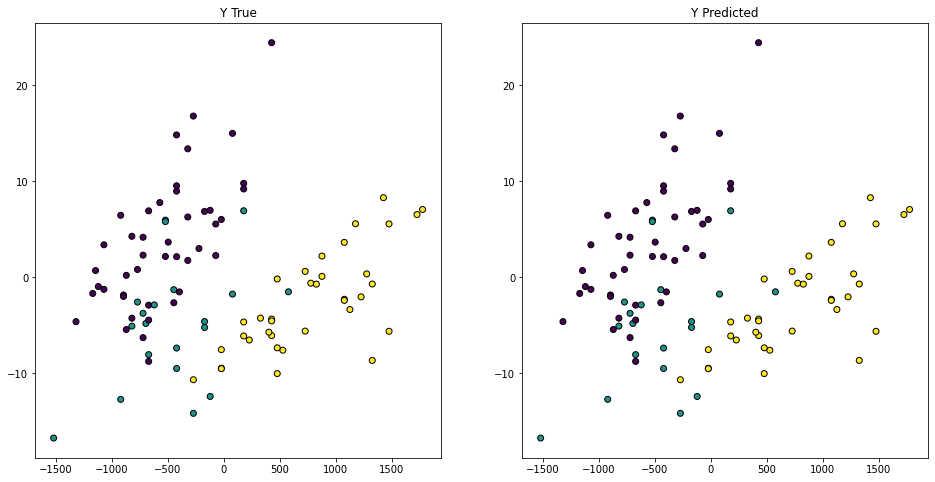

In [ ]:
pca = PCA(n_components=2)
pca.fit(x_train)
x_pc = pca.transform(x_test)

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(x_pc[:, 0], x_pc[:, 1], c=y_test, edgecolors='k')
plt.title('Y True')
plt.subplot(1, 2, 2)
plt.scatter(x_pc[:, 0], x_pc[:, 1], c=pred, edgecolors='k')
plt.title('Y Predicted')
plt.show()

<Figure size 1152x576 with 0 Axes>

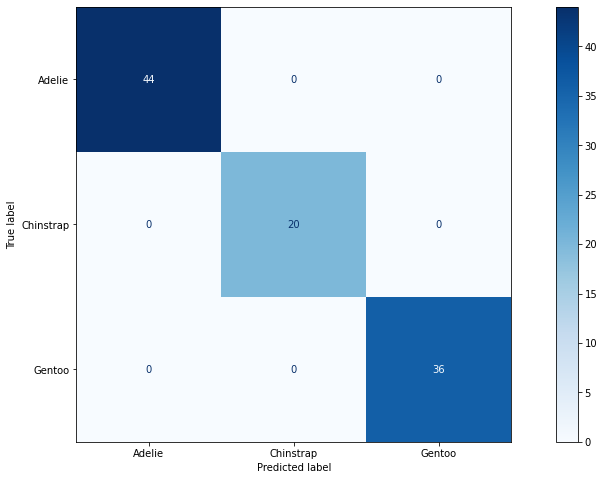

In [ ]:
plt.figure()
plot_confusion_matrix(
    lgr,
    x_test,
    y_test,
    display_labels=['Adelie', 'Chinstrap', 'Gentoo'],
    cmap=plt.cm.Blues
)
plt.show()